In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']='Songti SC'##IOS
#plt.rcParams['font.sans-serif']='Simhei'##Windows
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [16]:
data=pd.read_excel("./py project.xlsx")
#data=data.replace(",",'')
#data[['size','room_num','bathroom_num','price']]=data[['size','room_num','bathroom_num','price']].astype(int)

In [18]:
print(data.head())

  property_name address type  size  room_num  bathroom_num  price  \
0           愛海頌     長沙灣   屋苑   506         2             1  21500   
1         新葵興花園      葵涌   屋苑   480         2             1  15500   
2            東環      東涌   屋苑   643         3             2  18500   
3            嵐山      大埔   屋苑  1625         4             3  48000   
4            泮涌      大埔   村屋   700         3             1  16500   

  precise_address   longitude   latitude               long_la district  \
0        香港長沙灣愛海頌  114.163825  22.276284  114.163825,22.276284      中西区   
1       香港葵涌新葵興花園  114.135727  22.360950  114.135727,22.360950      葵青区   
2          香港東涌東環  113.939633  22.280441  113.939633,22.280441      离岛区   
3          香港大埔嵐山  114.163825  22.276284  114.163825,22.276284      中西区   
4          香港大埔泮涌  114.163825  22.276284  114.163825,22.276284      中西区   

                                                link  
0  https://www.28hse.com/rent/residential/propert...  
1  https://www.28hse.com

In [19]:
print(data.shape)

(30374, 13)


In [20]:
data.isnull().any()

property_name      False
address            False
type               False
size               False
room_num           False
bathroom_num       False
price              False
precise_address    False
longitude          False
latitude           False
long_la            False
district           False
link                True
dtype: bool

# Data analysis

In [21]:
#type histogram
print(data.type.value_counts())

屋苑          13011
公寓           7943
單幢式大廈        5313
洋房/獨立屋       1947
村屋           1660
居屋/夾屋/公屋      348
工商大廈           99
寫字樓            22
分間單位           18
店舖             12
海外二手盤           1
Name: type, dtype: int64


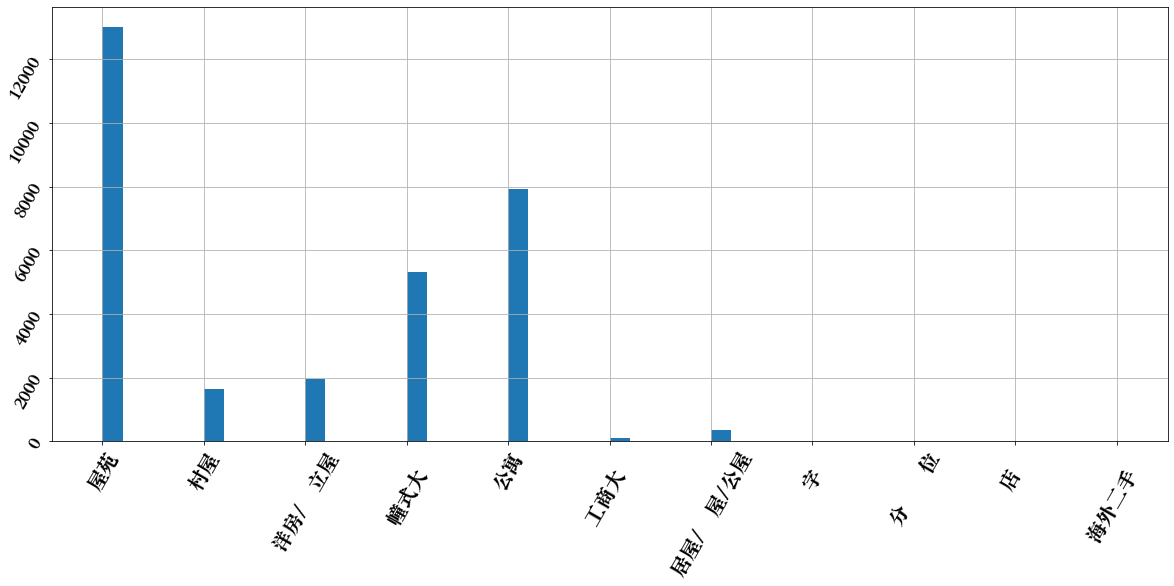

In [22]:
data.type.hist(bins = 50,figsize = (20,8))
plt.xticks(fontsize=20,rotation=60)
plt.yticks(fontsize=20,rotation=60)
plt.show()


In [23]:
#room_num pie chart
print(data.room_num.value_counts())

3     11387
2     10963
1      4925
4      2756
5       322
99        7
6         7
7         3
8         3
9         1
Name: room_num, dtype: int64


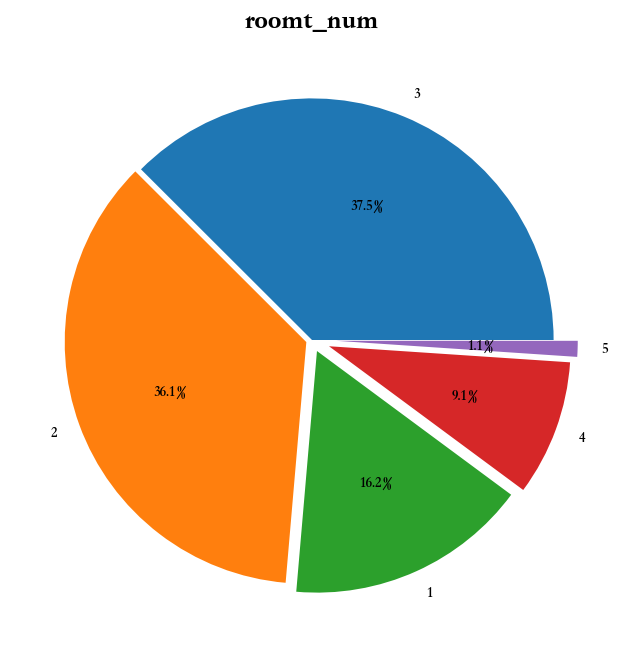

In [24]:
plt.figure(figsize = (20,8),dpi=100)
expand=np.linspace(0,0.1,len(data.room_num.value_counts()[:5]))
plt.pie(data.room_num.value_counts()[:5],labels=data.room_num.value_counts().index[:5],autopct="%.1f%%",explode=expand)
plt.title("roomt_num",fontsize=20)
plt.show()

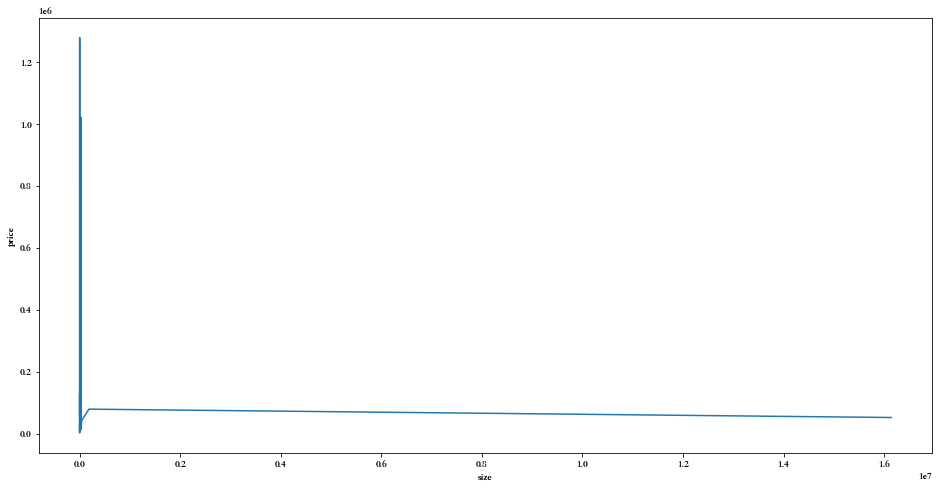

In [25]:
# the relationship between price and size
plt.figure(figsize=(16,8))
sns.lineplot(x='size', y='price', data=data)
# plt.xticks(np.linspace(0,max(data['size']),15))
# plt.xticks(np.linspace(0,max(data['price']),15))
plt.show()##obviously there are outliers

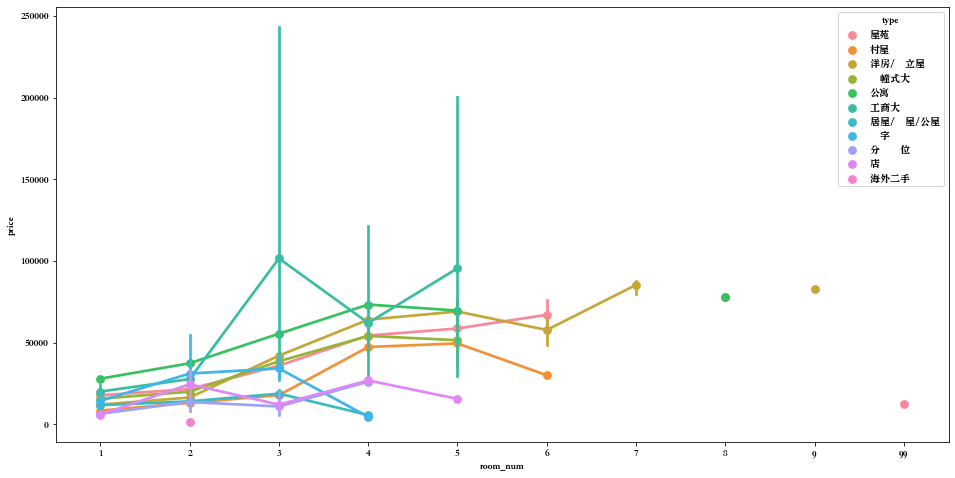

In [26]:
# Based on type, the distribution between room# and price
plt.figure(figsize=(16,8))
sns.pointplot(x='room_num', y='price', data=data, hue='type')
plt.show()##the price of bungalows and single houses is higher

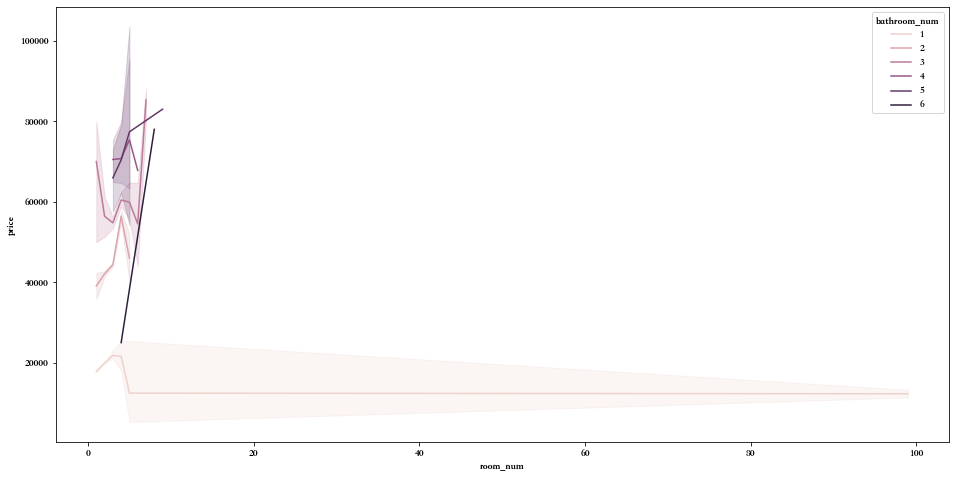

In [171]:
# Based on bathroom#, the distribution between price and room#

plt.figure(figsize=(16,8))
sns.lineplot(x='room_num', y='price', data=data, hue='bathroom_num')
plt.show()##obviously there are outliers, room# cannot be 100

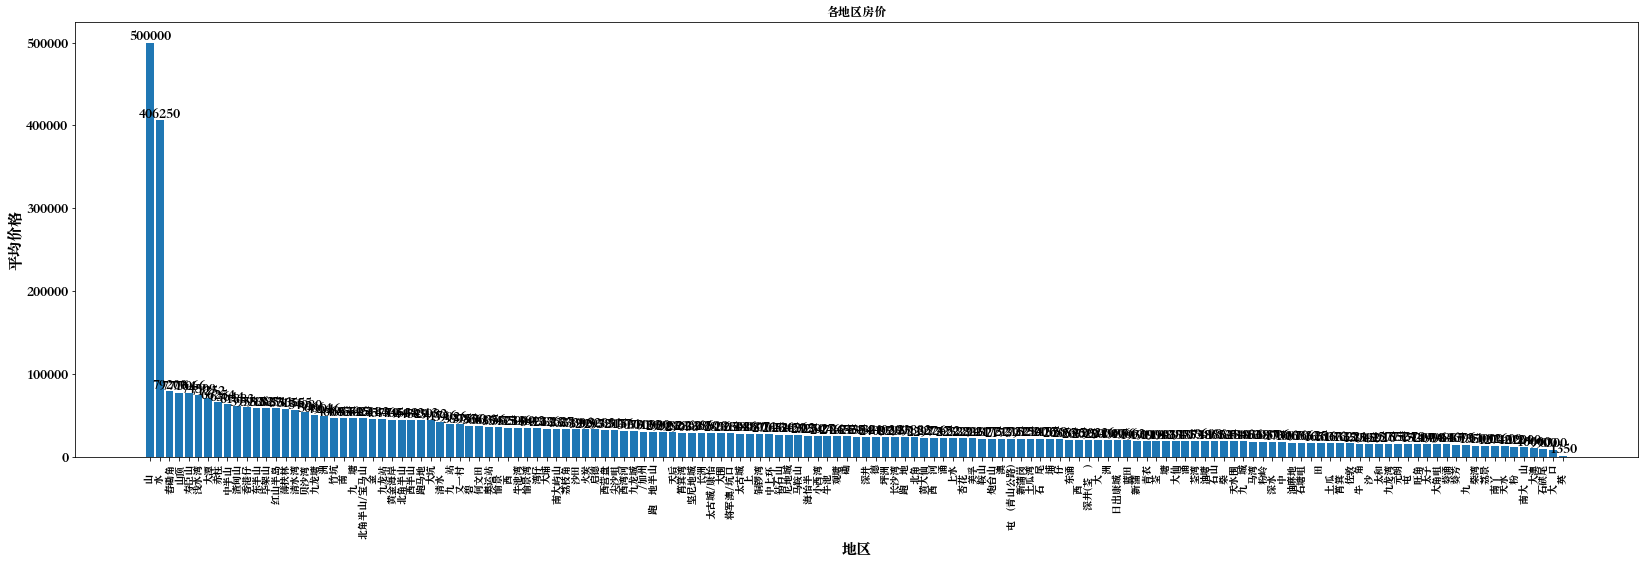

In [32]:
import re
##The price of each district
#Get the average price of each region and sort it
df_neighbourhood=data.groupby(by="address")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(28,8))
bar1=plt.bar(df_neighbourhood.index,df_neighbourhood.values)
plt.xticks(rotation=90,size=10)
plt.yticks(size=15)
plt.title("各地区房价")
plt.xlabel("地区",size=15)
plt.ylabel("平均价格",size=15)
for i in bar1:
    plt.text(i.get_x()+i.get_width()/2,i.get_height(),"%d"%int(i.get_height()),ha="center",va="bottom",fontsize=15)
plt.show()


Outlier analysis: size, room#, bathroom#, price

In [27]:
# Step 1: Single column outlier processing，
# Step 2: Multi-column outlier processing
def outlier_detection(data):
    plt.figure(figsize=(10,8),dpi=80)
    d= data.boxplot(return_type='dict')
    plt.xticks(rotation=60)
    plt.show()
    lst=list(data.columns)
    for v in lst:
        try:
            value = d['fliers'][lst.index(v)].get_ydata()
        except:pass
        for outlier in value:
            data = data[data.loc[:,v] != outlier]
        
    return data

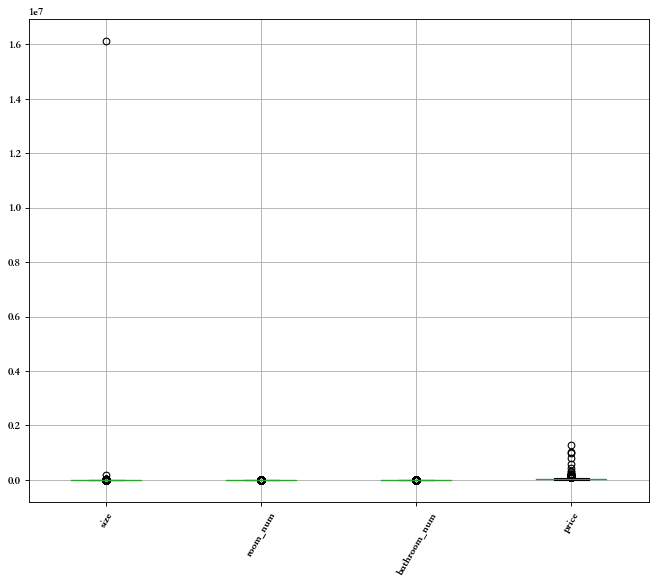

In [28]:
num_df=outlier_detection(data[['size','room_num','bathroom_num','price']])

In [29]:
print(data.shape,num_df.shape)

(30374, 13) (28053, 4)


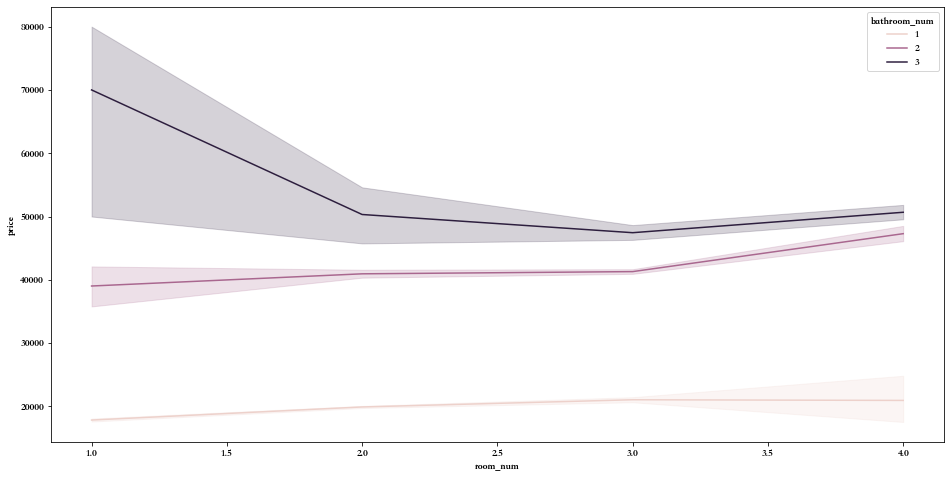

In [30]:
# Redo
# Calculate the distribution between price and room# based on bathroom#

plt.figure(figsize=(16,8))
sns.lineplot(x='room_num', y='price', data=num_df, hue='bathroom_num')
plt.show()##see that the more room#, the higher the price

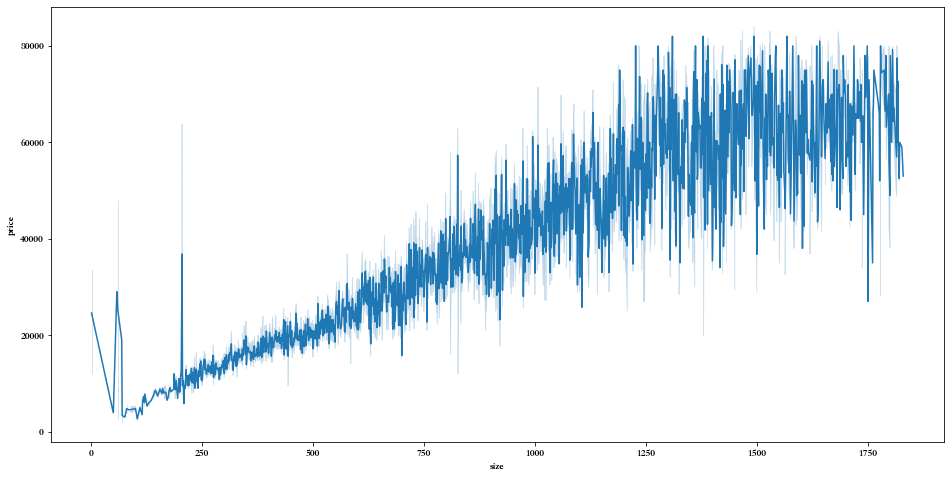

In [31]:
plt.figure(figsize=(16,8))
sns.lineplot(x='size', y='price', data=num_df)
# plt.xticks(np.linspace(0,max(data['size']),15))
# plt.xticks(np.linspace(0,max(data['price']),15))
plt.show()##Get the relationship between price and size ，the larger the size, the higher the price

# Feature Engineering

In [33]:
##The purpose is to convert non-numerical values into numerical values 
df1=data.iloc[num_df.index]
print(df1.shape)##retain the data after the outlier processing

(28053, 13)


In [34]:
df1.head()

,property_name,address,type,size,room_num,bathroom_num,price,precise_address,longitude,latitude,long_la,district,link
0,愛海頌,長沙灣,屋苑,506,2,1,21500,香港長沙灣愛海頌,114.163825,22.276284,"114.163825,22.276284",中西区,https://www.28hse.com/rent/residential/propert...
1,新葵興花園,葵涌,屋苑,480,2,1,15500,香港葵涌新葵興花園,114.135727,22.360950,"114.135727,22.360950",葵青区,https://www.28hse.com/rent/residential/propert...
2,東環,東涌,屋苑,643,3,2,18500,香港東涌東環,113.939633,22.280441,"113.939633,22.280441",离岛区,https://www.28hse.com/rent/residential/propert...
3,嵐山,大埔,屋苑,1625,4,3,48000,香港大埔嵐山,114.163825,22.276284,"114.163825,22.276284",中西区,https://www.28hse.com/rent/residential/propert...
4,泮涌,大埔,村屋,700,3,1,16500,香港大埔泮涌,114.163825,22.276284,"114.163825,22.276284",中西区,https://www.28hse.com/rent/residential/propert...


In [35]:
print(df1['precise_address'].value_counts())##Delete，too discrete,length=5929

香港西貢西貢村屋                 274
香港元朗村屋                   217
香港湾仔会景阁                  115
香港坚尼地城泓都                 110
香港深水埗匯璽                   99
                        ... 
香港天后君悦华庭                   1
香港九龙塘怡德花园 G5座              1
香港鴨脷洲悅海華庭                  1
香港愉景湾愉景湾1期 - 碧涛 海燕径1號      1
香港东涌映湾园4期 - 听涛轩15座         1
Name: precise_address, Length: 5929, dtype: int64


In [36]:
df1.index=range(len(df1))##Reindex
from sklearn.preprocessing import LabelEncoder
##LabelEncoder of address&type
df1['address']=LabelEncoder().fit_transform(df1['address'])
print(df1.head())

  property_name  address type  size  room_num  bathroom_num  price  \
0           愛海頌      128   屋苑   506         2             1  21500   
1         新葵興花園      104   屋苑   480         2             1  15500   
2            東環       65   屋苑   643         3             2  18500   
3            嵐山       36   屋苑  1625         4             3  48000   
4            泮涌       36   村屋   700         3             1  16500   

  precise_address   longitude   latitude               long_la district  \
0        香港長沙灣愛海頌  114.163825  22.276284  114.163825,22.276284      中西区   
1       香港葵涌新葵興花園  114.135727  22.360950  114.135727,22.360950      葵青区   
2          香港東涌東環  113.939633  22.280441  113.939633,22.280441      离岛区   
3          香港大埔嵐山  114.163825  22.276284  114.163825,22.276284      中西区   
4          香港大埔泮涌  114.163825  22.276284  114.163825,22.276284      中西区   

                                                link  
0  https://www.28hse.com/rent/residential/propert...  
1  https://www.28h

In [37]:
df1['type']=LabelEncoder().fit_transform(df1['type'])
print(df1.head())

  property_name  address  type  size  room_num  bathroom_num  price  \
0           愛海頌      128     5   506         2             1  21500   
1         新葵興花園      104     5   480         2             1  15500   
2            東環       65     5   643         3             2  18500   
3            嵐山       36     5  1625         4             3  48000   
4            泮涌       36     8   700         3             1  16500   

  precise_address   longitude   latitude               long_la district  \
0        香港長沙灣愛海頌  114.163825  22.276284  114.163825,22.276284      中西区   
1       香港葵涌新葵興花園  114.135727  22.360950  114.135727,22.360950      葵青区   
2          香港東涌東環  113.939633  22.280441  113.939633,22.280441      离岛区   
3          香港大埔嵐山  114.163825  22.276284  114.163825,22.276284      中西区   
4          香港大埔泮涌  114.163825  22.276284  114.163825,22.276284      中西区   

                                                link  
0  https://www.28hse.com/rent/residential/propert...  
1  https://w

In [38]:
df1['district']=LabelEncoder().fit_transform(df1['district'])
print(df1.head())

  property_name  address  type  size  room_num  bathroom_num  price  \
0           愛海頌      128     5   506         2             1  21500   
1         新葵興花園      104     5   480         2             1  15500   
2            東環       65     5   643         3             2  18500   
3            嵐山       36     5  1625         4             3  48000   
4            泮涌       36     8   700         3             1  16500   

  precise_address   longitude   latitude               long_la  district  \
0        香港長沙灣愛海頌  114.163825  22.276284  114.163825,22.276284         1   
1       香港葵涌新葵興花園  114.135727  22.360950  114.135727,22.360950        14   
2          香港東涌東環  113.939633  22.280441  113.939633,22.280441        12   
3          香港大埔嵐山  114.163825  22.276284  114.163825,22.276284         1   
4          香港大埔泮涌  114.163825  22.276284  114.163825,22.276284         1   

                                                link  
0  https://www.28hse.com/rent/residential/propert...  
1  htt

In [39]:
print(len(set(df1['property_name'])))##Delete, too discrete,length=5534

5534


In [40]:
df2=df1.drop(['property_name','precise_address','link'],axis=1)
print(df2.head())

   address  type  size  room_num  bathroom_num  price   longitude   latitude  \
0      128     5   506         2             1  21500  114.163825  22.276284   
1      104     5   480         2             1  15500  114.135727  22.360950   
2       65     5   643         3             2  18500  113.939633  22.280441   
3       36     5  1625         4             3  48000  114.163825  22.276284   
4       36     8   700         3             1  16500  114.163825  22.276284   

                long_la  district  
0  114.163825,22.276284         1  
1  114.135727,22.360950        14  
2  113.939633,22.280441        12  
3  114.163825,22.276284         1  
4  114.163825,22.276284         1  


In [41]:
data=data.iloc[num_df.index]
data.index=range(len(data))

# One-way analysis of variance

In [45]:
#Under different bathroom#, the impact of address on price
bath_1 = data[data['bathroom_num'] == 1]
print(bath_1) 

      property_name address    type  size  room_num  bathroom_num  price  \
0               愛海頌     長沙灣      屋苑   506         2             1  21500   
1             新葵興花園      葵涌      屋苑   480         2             1  15500   
4                泮涌      大埔      村屋   700         3             1  16500   
5              利安大樓      旺角  洋房/獨立屋   803         3             1  22000   
6              寶星中心      葵涌      屋苑   288         2             1  10800   
...             ...     ...     ...   ...       ...           ...    ...   
27950           乐天峯     跑马地      公寓  1280         3             1  78000   
27972        香岛道45号     寿臣山      公寓  1314         1             1  83000   
27986        香岛道45号     寿臣山      屋苑  1314         2             1  83000   
27992        香岛道45号     寿臣山   單幢式大廈  1314         1             1  83000   
27999        香岛道45号     寿臣山      屋苑  1314         3             1  80000   

      precise_address   longitude   latitude               long_la district  \
0       

In [46]:
print(bath_1.price.describe())#When bathroom# =1, Maximum price=84000, Minimum price=2000. 

count    15813.000000
mean     19426.925125
std       8402.543208
min       2000.000000
25%      13800.000000
50%      17800.000000
75%      23000.000000
max      84000.000000
Name: price, dtype: float64


In [47]:
def box_plot_outliers(data,data_ser, box_scale):
    iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
    val_low = data_ser.quantile(0.25) - iqr
    val_up = data_ser.quantile(0.75) + iqr
    a = data[(data_ser> val_low) & (data_ser<val_up)] #Delete outliers
    b = a[['price','address']]#Because analysis of variance only needs address and prices , delete other factors
    return b
e_data = box_plot_outliers(bath_1,bath_1.price,2)
print(e_data)

       price address
0      21500     長沙灣
1      15500      葵涌
4      16500      大埔
5      22000      旺角
6      10800      葵涌
...      ...     ...
22679  38000     西半山
22682  38400     铜锣湾
22688  39000     中半山
22702  37090     贝沙湾
22703  40000     西半山

[15455 rows x 2 columns]


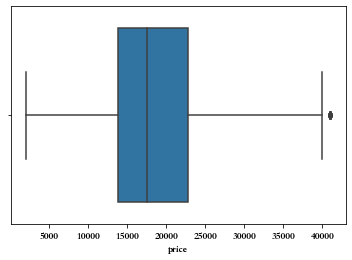

In [48]:
sns.boxplot(e_data.price,whis = 2)
plt.show()

In [49]:
print(e_data.price.describe())

count    15455.000000
mean     18724.828276
std       6976.719130
min       2000.000000
25%      13800.000000
50%      17500.000000
75%      22800.000000
max      41000.000000
Name: price, dtype: float64


In [50]:
print(df1.shape)

(28053, 13)


In [51]:
e_data['address']=df1.iloc[e_data.index]['address']##Replace address with numeric type
print(e_data.head())

   price  address
0  21500      128
1  15500      104
4  16500       36
5  22000       63
6  10800      104


In [52]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('price ~ address',e_data).fit()
anovat = anova_lm(model)
print(anovat)

               df        sum_sq       mean_sq          F        PR(>F)
address       1.0  7.108073e+09  7.108073e+09  147.41601  9.069174e-34
Residual  15453.0  7.451093e+11  4.821778e+07        NaN           NaN


In [196]:
##address greatly affects price

Under different room#, the impact of address on price

In [53]:
print(data.head())

  property_name address type  size  room_num  bathroom_num  price  \
0           愛海頌     長沙灣   屋苑   506         2             1  21500   
1         新葵興花園      葵涌   屋苑   480         2             1  15500   
2            東環      東涌   屋苑   643         3             2  18500   
3            嵐山      大埔   屋苑  1625         4             3  48000   
4            泮涌      大埔   村屋   700         3             1  16500   

  precise_address   longitude   latitude               long_la district  \
0        香港長沙灣愛海頌  114.163825  22.276284  114.163825,22.276284      中西区   
1       香港葵涌新葵興花園  114.135727  22.360950  114.135727,22.360950      葵青区   
2          香港東涌東環  113.939633  22.280441  113.939633,22.280441      离岛区   
3          香港大埔嵐山  114.163825  22.276284  114.163825,22.276284      中西区   
4          香港大埔泮涌  114.163825  22.276284  114.163825,22.276284      中西区   

                                                link  
0  https://www.28hse.com/rent/residential/propert...  
1  https://www.28hse.com

In [54]:
##Get the distribution of room#
print(data['room_num'].value_counts())

2    10892
3    10540
1     4919
4     1702
Name: room_num, dtype: int64


In [55]:
p_data = data[data['room_num'] == 3]
print(p_data.price.describe())

count    10540.000000
mean     37907.919924
std      17113.063712
min       2800.000000
25%      24000.000000
50%      35000.000000
75%      49000.000000
max      84000.000000
Name: price, dtype: float64


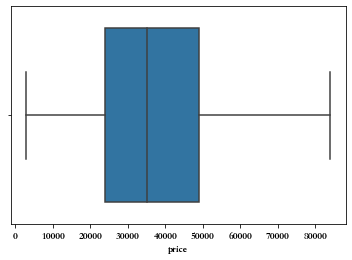

In [56]:
p_data = p_data[p_data['price']>0]
p_data = box_plot_outliers(p_data,p_data.price,2)
sns.boxplot(p_data.price,whis = 2)
plt.show()

In [57]:
p_data['address']=df1.iloc[p_data.index]
model = ols('price ~ address',p_data).fit()
anovat = anova_lm(model)
print(anovat)

              df        sum_sq       mean_sq          F  PR(>F)
address   2653.0  2.832634e+12  1.067710e+09  33.177435     0.0
Residual  7886.0  2.537857e+11  3.218180e+07        NaN     NaN


Under different types, the impact of address on price

In [58]:
##Get the type distribution
print(data['type'].value_counts())

屋苑          12441
公寓           6984
單幢式大廈        5178
洋房/獨立屋       1559
村屋           1432
居屋/夾屋/公屋      347
工商大廈           63
寫字樓            21
分間單位           17
店舖             10
海外二手盤           1
Name: type, dtype: int64


In [59]:
t_data = data[data['type'] == '屋苑']
print(t_data.price.describe())

count    12441.000000
mean     28238.613777
std      14699.815558
min       3000.000000
25%      17500.000000
50%      23500.000000
75%      35000.000000
max      84000.000000
Name: price, dtype: float64


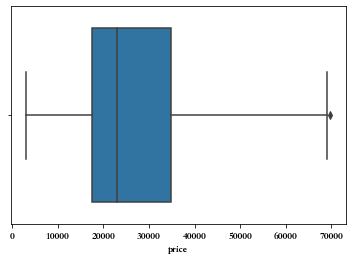

In [60]:
t_data = box_plot_outliers(t_data,t_data.price,2)
sns.boxplot(t_data.price,whis = 2)
plt.show()

In [61]:
t_data['address']=df1.iloc[t_data.index]
model = ols('price ~ address',t_data).fit()
anovat = anova_lm(model)
print(anovat)

              df        sum_sq       mean_sq          F  PR(>F)
address   2626.0  1.611203e+12  6.135579e+08  13.424503     0.0
Residual  9533.0  4.356994e+11  4.570433e+07        NaN     NaN


Under different districts, the impact of address on price

In [62]:
##Get the district distribution
print(data['district'].value_counts())

中西区     13977
湾仔区      2392
油尖旺区     2200
东区       1315
离岛区      1243
九龙城区     1214
西贡区      1071
沙田区       916
南区        850
荃湾区       663
深水埗区      618
大埔区       420
元朗区       306
观塘区       296
葵青区       186
屯门区       184
北区        126
黄大仙区       76
Name: district, dtype: int64


In [63]:
d_data = data[data['district'] == '中西区']
print(d_data.price.describe())

count    13977.000000
mean     30278.427917
std      17081.645979
min       1350.000000
25%      16800.000000
50%      25800.000000
75%      40000.000000
max      84000.000000
Name: price, dtype: float64


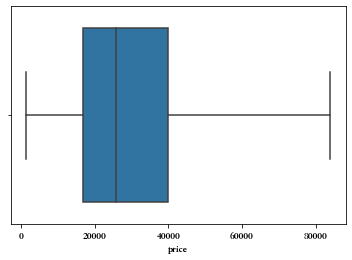

In [64]:
d_data = box_plot_outliers(d_data,d_data.price,2)
sns.boxplot(d_data.price,whis = 2)
plt.show()

In [65]:
d_data['address']=df1.iloc[d_data.index]
model = ols('price ~ address',d_data).fit()
anovat = anova_lm(model)
print(anovat)

               df        sum_sq       mean_sq          F  PR(>F)
address    2633.0  3.463594e+12  1.315455e+09  24.287395     0.0
Residual  11343.0  6.143602e+11  5.416206e+07        NaN     NaN
